In [1]:
#import required libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans

In [11]:
#import database
df = pd.read_csv('C:\\Users\\Dell\\Desktop\\test\\loan_data_set.csv')

In [12]:
#get some top rows of the database
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [13]:
#drop Loan_ID and Loan_Status
df = df.drop('Loan_ID', axis=1)
df = df.drop('Loan_Status', axis=1)

In [14]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban


In [15]:
#remove Nan Values
nan_value = float("NaN")
df.replace("", nan_value, inplace=True)
df.dropna(subset = ["LoanAmount"],inplace=True)
df.dropna(subset = ["Gender"],inplace=True)

In [16]:
#get the datatypes of all the coloumns
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [17]:
#Since it is showing the error that "Female","Male" cannot be converted to int therefore we have replaced it with "1","0"
df.Gender=df.Gender.replace(to_replace=['Female','Male'],value=['1','0'])

In [18]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,0,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,0,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,0,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,0,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
5,0,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,1,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
610,0,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural
611,0,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban
612,0,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban


In [19]:
#convert Object to String

df["Gender"]=df["Gender"].astype(str).astype(int)

In [20]:
#Updated datatype 
df.dtypes

Gender                 int32
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

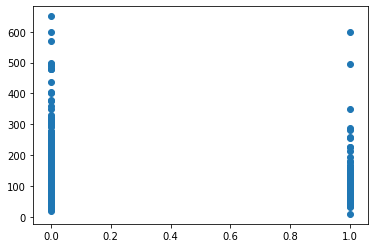

In [24]:
#plot Scatter plot
plt.scatter(df.Gender,df.LoanAmount)

In [30]:
#From scatter plot we can see that there are 2 cluster.
km = KMeans(n_clusters=2)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [33]:
#Here, we are basically creating an array which will predict and fit the two columns in an array 
x_predicted = km.fit_predict(df[['Gender','LoanAmount']])
x_predicted

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [34]:
#x_predicted added to the database with a coloumn name "cluster" 
df["cluster"] = x_predicted
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,cluster
1,0,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,0,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,0
3,0,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,0
4,0,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,0
5,0,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


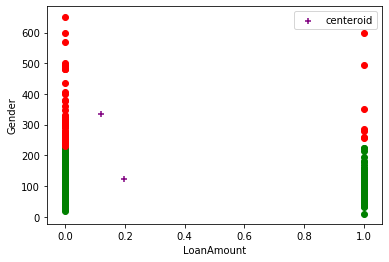

In [36]:
#Plot KMeans Plot
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]


plt.scatter(df1.Gender,df1.LoanAmount,color="green")
plt.scatter(df2.Gender,df2.LoanAmount,color="red")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='+',label='centeroid')
plt.xlabel('LoanAmount')
plt.ylabel('Gender')
plt.legend()
